In [1]:
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
from model_comparison import *
import model
from run_model import init_default_model

In [2]:
test_model1 = init_default_model([2, 1, 1, 1], 150)
test_model2 = init_default_model([1, 1, 1, 1], 150)
test_model3 = init_default_model([0.5, 1, 1, 1], 150)

for i in range(150):
    test_model1.step()
    test_model2.step()
    test_model3.step()
    
model_state1 = test_model1.get_binary_model_state()
model_state2 = test_model2.get_binary_model_state()    
model_state3 = test_model3.get_binary_model_state()    

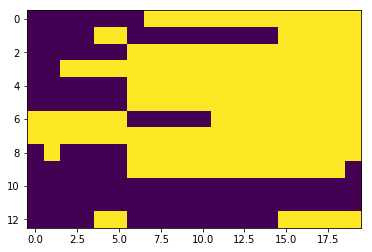

In [3]:
plt.imshow(model_state1)
plt.show()

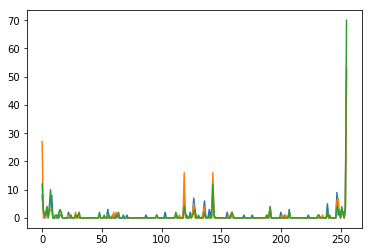

In [4]:
plt.plot(count_lbp(model_state1))
plt.plot(count_lbp(model_state2))
plt.plot(count_lbp(model_state3))
plt.show()

In [5]:
prefered_seats = np.zeros((test_model1.classroom.width, test_model1.classroom.num_rows))
for student in test_model1.students:
    prefered_seats[student.prefered_seat] += 1

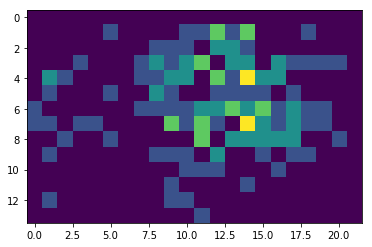

In [6]:
plt.imshow(prefered_seats.T)
plt.show()

(15, 4)


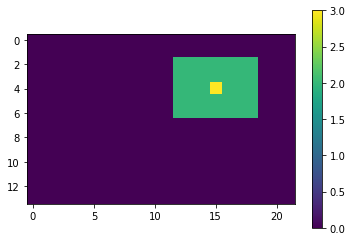

In [18]:
student = test_model1.students[2]
print(student.prefered_seat)
seat_utilities = np.zeros(prefered_seats.shape)
for x in range(seat_utilities.shape[0]):
    for y in range(seat_utilities.shape[1]):
#         print(model.moore_distance((x, y), student.prefered_seat))
        x1, y1 = student.prefered_seat
        if abs(x-x1) <= 3 and abs(y-y1) <= 2:
            seat_utilities[x][y] = 2
            
seat_utilities[student.prefered_seat] = 3
plt.imshow(seat_utilities.T)
plt.colorbar()
plt.show()

In [6]:
# run model 20 times and check heatmap
final_seats = np.zeros((13, 20))

for i in range(50):
    model = init_default_model([0, 1, 0, 1], 150, seed=i**2+3)
    for j in range(150):
        model.step()
    final_seats += model.get_binary_model_state()
    print(i, end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

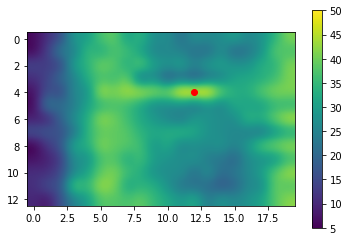

In [7]:
plt.imshow(final_seats, interpolation='quadric')
plt.plot(12, 4, 'ro')
plt.colorbar()
plt.show()